<a href="https://colab.research.google.com/github/Agustindwinurhamidah/Machine-Learning/blob/main/KUIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
from google.colab import drive
import io

drive.mount('/content/drive')
url = '/content/drive/MyDrive/KUIS/dataset.csv'

df = pd.read_csv(url)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [22]:
df.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [23]:
df.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [24]:
gruptahun = df.groupby('tahun').sum()
gruptahun.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,jml_vltr_terlibat
tahun,,,,,,,
2019,138890.0,142679.0,153786.0,148845.0,156456.0,0.0,0
2020,171605.0,170553.0,188988.0,189085.0,168368.0,8812.0,39
2021,135183.0,138061.0,138218.0,148081.0,138214.0,0.0,26
2022,206623.0,201200.0,188555.0,204351.0,154174.0,0.0,49


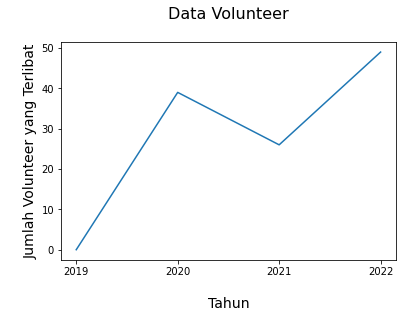

In [25]:
#line plot

import matplotlib.pyplot as plt
tahun = ['2019', '2020', '2021', '2022']
plt.plot(tahun, gruptahun['jml_vltr_terlibat'])

plt.title('Data Volunteer\n', size=16)
plt.ylabel('\nJumlah Volunteer yang Terlibat', size=14)
plt.xlabel('\nTahun', size=14)
plt.show()

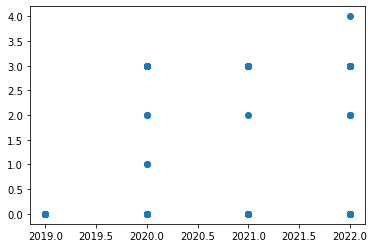

In [26]:
#scatter plot

plt.scatter(df['tahun'], df['jml_vltr_terlibat'])
plt.show()


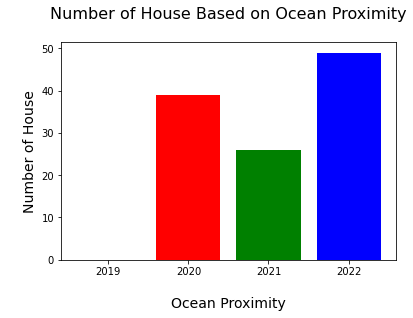

In [27]:
#bar plot 

plt.bar( ['2019', '2020', '2021', '2022'], gruptahun['jml_vltr_terlibat'], color=['yellow','red','green', 'blue'])

plt.xlabel('\nOcean Proximity', size=14)
plt.ylabel('\nNumber of House', size=14)
plt.title('Number of House Based on Ocean Proximity\n', size=16)
plt.show()

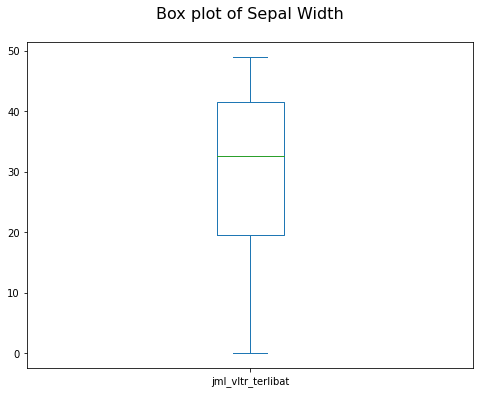

In [28]:
#box plot

# create box plot
gruptahun['jml_vltr_terlibat'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Sepal Width\n', size=16)
plt.show()

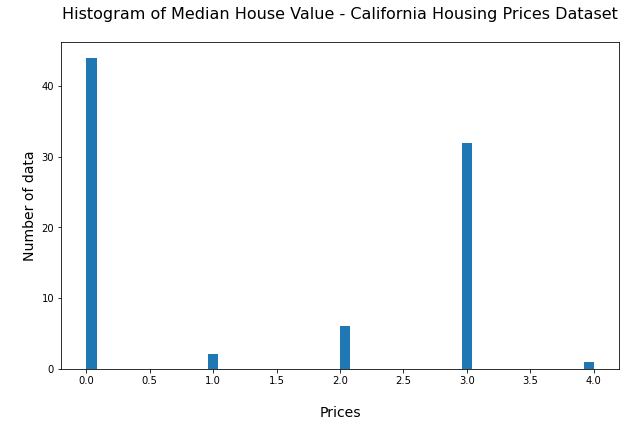

In [29]:
#histogram 

df['jml_vltr_terlibat'].plot(kind='hist', figsize=(10, 6), bins=50)

plt.title('Histogram of Median House Value - California Housing Prices Dataset\n', size=16)
plt.ylabel('\nNumber of data', size=14)
plt.xlabel('\nPrices', size=14)
plt.show()

In [31]:
df = df.replace(to_replace=['TIDAK ADA', 'TIDAK'], value=[0, 0])
df['keterlibatan_vltr'].replace(to_replace=['YA'], value=[1])
df['skema'].replace(to_replace=['REGULAR', 'KEMITRAAN'], value=[0, 1])
df['luaran_hki'].replace(to_replace=['ADA'], value=[1])
df['jenis_luaran_hki'].replace(to_replace=['Hak Cipta'], value=[1])
df['potensi_hki'].replace(to_replace=['TIDAK', 'YA', 'DRAFT', 'SUDAH'], value=[0, 1, 2, 3])
df['luaran_lain'].replace(to_replace=['YA'], value=[1])
df['jenis_luaran_lain'].replace(to_replace=['Publikasi Media Massa', 'Artikel Ilmiah', 'Modul Ajar'], value=[1, 2, 3])
df['status_luaran_lain'].replace(to_replace=['Draft', 'Terpublikasi'], value=[1, 2])

df.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,2019,REGULER,0,0,0,0,0,0
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,2019,REGULER,0,0,0,0,0,0
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,2019,REGULER,0,0,0,0,0,0
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,2019,REGULER,0,0,0,0,0,0
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,2019,REGULER,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,YA,3,2022,REGULER,0,0,0,0,0,0
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,YA,3,2022,REGULER,0,0,0,0,0,0
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,YA,3,2022,REGULER,0,0,0,0,0,0
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,YA,3,2022,REGULER,0,0,0,0,0,0


In [33]:
kolom_X = ['jml_vltr_terlibat','tahun','skema','luaran_hki','jenis_luaran_hki','potensi_hki','luaran_lain','jenis_luaran_lain','status_luaran_lain']
X = df[kolom_X].values
y = df['keterlibatan_vltr'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((17, 9), (17,))

In [34]:
X_train
y_train

array([0, 0, 'YA', 0, 'YA', 0, 0, 0, 'YA', 0, 'YA', 'YA', 'YA', 'YA',
       'YA', 'YA', 'YA', 0, 0, 'YA', 0, 0, 0, 'YA', 'YA', 'YA', 'YA',
       'YA', 0, 'YA', 0, 0, 0, 'YA', 0, 0, 'YA', 'YA', 0, 'YA', 0, 0, 0,
       0, 'YA', 0, 'YA', 0, 'YA', 'YA', 0, 0, 'YA', 'YA', 0, 'YA', 0,
       'YA', 0, 0, 'YA', 'YA', 'YA', 0, 0, 0, 'YA', 'YA'], dtype=object)